In [48]:
from sklearn import *
from tensorflow import keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_digits
from tensorflow.keras.utils import to_categorical
import pandas as pd
import os
from collections import Counter
root_dir = r'/Users/pankaj/Library/Mobile Documents/com~apple~CloudDocs/Capstone/Wikipedia Data'


result_path = annot_file_path = os.path.join(root_dir , 'comments_with_grouped_annoptations.tsv')

merged_comments = pd.read_table(result_path)


In [49]:
print (merged_comments.head())

   Unnamed: 0  rev_id                                            comment  \
0           0   37675  `-NEWLINE_TOKENThis is not ``creative``.  Thos...   
1           1   44816  `NEWLINE_TOKENNEWLINE_TOKEN:: the term ``stand...   
2           2   49851  NEWLINE_TOKENNEWLINE_TOKENTrue or false, the s...   
3           3   89320   Next, maybe you could work on being less cond...   
4           4   93890               This page will need disambiguation.    

   year  logged_in       ns  sample  split  worker_id  quoting_attack  \
0  2002      False  article  random  train       9721             0.0   
1  2002      False  article  random  train      20234             0.0   
2  2002      False  article  random  train      26474             0.0   
3  2002       True  article  random    dev      26738             0.0   
4  2002       True  article  random  train       8010             0.0   

   recipient_attack  third_party_attack  other_attack  attack  
0               0.0                 0.0 

In [50]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np



In [51]:
merged_comments['recipient_attack'] = merged_comments['recipient_attack'].apply(lambda x : 1 if x> 1 else 0 )
X_train = merged_comments['comment']
y = merged_comments['recipient_attack']
one_hot_train_labels = to_categorical(y)

In [52]:
sequence

<module 'tensorflow.keras.preprocessing.sequence' from '/Users/pankaj/anaconda/envs/nlp/lib/python3.7/site-packages/tensorflow_core/python/keras/api/_v2/keras/preprocessing/sequence/__init__.py'>

In [53]:
one_hot_train_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [54]:
merged_comments['new_attack'] = merged_comments['attack'].apply(lambda x : 1 if x> 1 else 0 )

In [55]:
Counter(merged_comments['attack'])

Counter({0.0: 57233,
         4.0: 4133,
         2.0: 10147,
         1.0: 20876,
         3.0: 6143,
         6.0: 2646,
         7.0: 2439,
         5.0: 3127,
         8.0: 2506,
         9.0: 2598,
         14.0: 132,
         10.0: 1920,
         11.0: 159,
         18.0: 115,
         12.0: 152,
         19.0: 108,
         26.0: 113,
         15.0: 125,
         28.0: 113,
         25.0: 95,
         17.0: 119,
         23.0: 91,
         21.0: 78,
         13.0: 116,
         30.0: 17,
         27.0: 118,
         16.0: 104,
         24.0: 98,
         20.0: 82,
         29.0: 69,
         22.0: 88,
         36.0: 2,
         31.0: 1,
         42.0: 1})

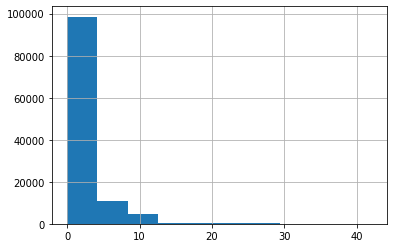

In [56]:
merged_comments.attack.hist()

In [57]:
######



In [58]:
one_hot_train_labels.shape

(115864, 2)

In [59]:
one_hot_train_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [60]:
merged_comments['recipient_attack'].unique()

array([0, 1])

### TODO change model with proper word settings 

In [61]:
# Prepare training input  
training_samples = 90000
validation_samples = 10000
max_words = 30000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


Found 187899 unique tokens.


In [62]:
from collections import Counter
comment_lengths = [len (seq) for seq in sequences]

In [63]:
word_counts_per_review = Counter(comment_lengths)

In [64]:
import numpy as np
np.percentile(comment_lengths, 90)

154.0

<BarContainer object of 1259 artists>

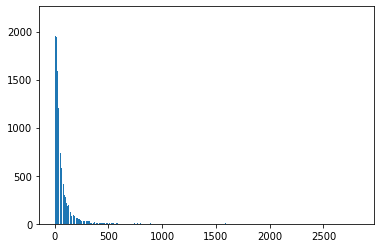

In [65]:
plt.bar( word_counts_per_review.keys(), word_counts_per_review.values())

In [66]:
maxlen = 150

In [67]:
data = pad_sequences(sequences, maxlen=maxlen)
print('Shape of data tensor:', data.shape)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
x_train = data[:training_samples]
x_val = data[training_samples: (training_samples + validation_samples)]
x_test = data[(training_samples + validation_samples) : ]

Shape of data tensor: (115864, 150)


In [68]:
x_test.shape

(15864, 150)

In [69]:
# Prepare labels 
labels = np.asarray(one_hot_train_labels)
print('Shape of label tensor:', labels.shape)
labels = labels[indices]
y_train = labels[:training_samples]
y_val = labels[training_samples: training_samples + validation_samples]
y_test = labels[(training_samples + validation_samples) : ]

Shape of label tensor: (115864, 2)


In [70]:
log_dir='logs/log_basic1'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)


tb_collback = keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq= 1)
early_sp_cb= keras.callbacks.EarlyStopping(monitor='acc', min_delta=0.01, patience=3, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
callbacks = [tb_collback, early_sp_cb]
#callbacks = []

In [71]:
from tensorboard.plugins import projector

In [ ]:
from tensorflow.keras.layers import LSTM
embedding_dim = 16
model = Sequential()
#embedding = Embedding(max_words, embedding_dim , weights =w)
embedding = Embedding(max_words, embedding_dim)

#embedding.trainable = False
model.add(embedding)
model.add(LSTM(32))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [76]:
from tensorflow.keras.layers import LSTM
model = Sequential()
embeddings_index = {}

embedding_dim = 2
with open('../word2_wec_poinc', 'r') as f:
    #emb= f.readlines()


    for line in f:
        values = line.split()
        word = values[0]
        w= word.split(".")[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[w] = coefs

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

embedding = Embedding(max_words, embedding_dim  )
#embedding = Embedding(max_words, embedding_dim)

#embedding.trainable = False
model.add(embedding)
model.add(LSTM(32))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
#model.layers[0].trainable = False

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 2)           60000     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                4480      
_________________________________________________________________
flatten_4 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 65,602
Trainable params: 65,602
Non-trainable params: 0
_________________________________________________________________


In [73]:
y_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [74]:
y_train.shape

(90000, 2)

In [77]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs= 10,
batch_size=128,
validation_data=(x_val, y_val), callbacks= callbacks)

Train on 90000 samples, validate on 10000 samples
Epoch 1/10
90000/90000 [==============================] - 57s 632us/sample - loss: 0.4331 - acc: 0.8137 - val_loss: 0.4142 - val_acc: 0.8289
Epoch 2/10
90000/90000 [==============================] - 56s 622us/sample - loss: 0.3345 - acc: 0.8613 - val_loss: 0.3356 - val_acc: 0.8478
Epoch 3/10
90000/90000 [==============================] - 56s 627us/sample - loss: 0.3157 - acc: 0.8693 - val_loss: 0.3192 - val_acc: 0.8654
Epoch 4/10
90000/90000 [==============================] - 56s 621us/sample - loss: 0.3038 - acc: 0.8751 - val_loss: 0.3138 - val_acc: 0.8719
Epoch 5/10
90000/90000 [==============================] - 57s 633us/sample - loss: 0.2950 - acc: 0.8783 - val_loss: 0.3173 - val_acc: 0.8729
Epoch 6/10
90000/90000 [==============================] - 57s 635us/sample - loss: 0.2888 - acc: 0.8814 - val_loss: 0.3078 - val_acc: 0.8716
Epoch 7/10
90000/90000 [==============================] - 55s 613us/sample - loss: 0.2850 - acc: 0.8828 

In [78]:

with open(os.path.join(log_dir, 'metadata.tsv'), "w") as f:
    for subwords in tokenizer.index_word.values():
        f.write("{}\n".format(subwords))
  # Fill in the rest of the labels with "unknown"
    for unknown in range(1, tokenizer.num_words - len(tokenizer.index_word.values())):
        f.write("unknown #{}\n".format(unknown))

In [79]:
model.save('hyperbolic_model.h5')

In [80]:
weights = tf.Variable(model.layers[0].get_weights()[0][1:])
# Create a checkpoint from embedding, the filename and key are
# name of the tensor.
checkpoint = tf.train.Checkpoint(embedding=weights)
checkpoint.save(os.path.join(log_dir, "embedding.ckpt"))

# Set up config
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
# The name of the tensor will be suffixed by `/.ATTRIBUTES/VARIABLE_VALUE`
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(log_dir, config)

In [ ]:
weights

#predictions = model.predict(test_data)

In [81]:
import os
PATH = os.getenv('PATH')
%env PATH=/Users/pankaj/anaconda/envs/nlp/bin:$PATH
    
%load_ext tensorboard
%tensorboard --logdir logs/log_basic


env: PATH=/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/condabin:/Users/pankaj/anaconda/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/opt/X11/bin


Reusing TensorBoard on port 6011 (pid 50348), started 1 day, 1:31:03 ago. (Use '!kill 50348' to kill it.)

In [82]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6012: logdir my_log_dir (started 1 day, 2:18:06 ago; pid 23210)
  - port 6011: logdir logs/log_basic (started 1 day, 1:31:44 ago; pid 50348)


In [83]:
notebook.display( height=1000) 


Selecting TensorBoard with logdir logs/log_basic (started 1 day, 1:31:47 ago; port 6011, pid 50348).
